In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_embedded_data.csv')

In [3]:
df.head()

,sample_id,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec764,vec765,vec766,vec767,vec768,Unit_grams,Unit_ml,Value,image_link,price
0,33127,-0.735497,-0.417253,0.038383,0.232514,-0.344284,0.010172,0.112404,0.483168,0.052909,...,0.133708,-0.155291,-0.503165,-0.290897,0.437678,0,1,2129.292000,https://m.media-amazon.com/images/I/51mo8htwTH...,4.89
1,198967,-0.550695,-0.316541,0.198338,-0.413873,-0.257527,0.154069,0.037859,0.443655,-0.694422,...,-0.558706,-0.125691,-0.580041,-0.078787,0.353939,1,0,907.184000,https://m.media-amazon.com/images/I/71YtriIHAA...,13.12
2,261251,-0.718114,-0.202316,-0.054308,0.201210,0.027019,0.127905,-0.027772,0.424997,-0.128802,...,-0.158239,-0.461509,-0.249500,-0.180694,0.116885,1,0,323.184300,https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97
3,55858,-0.648414,-0.317754,-0.011313,-0.135515,-0.056709,-0.620720,-0.187950,0.369419,0.150746,...,0.434482,0.037556,-0.404532,-0.016853,0.581076,1,0,318.931875,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34
4,292686,-0.829020,0.063603,-0.150531,-0.421938,-0.381597,0.586611,0.142365,0.451762,0.080123,...,-0.374897,-0.475030,-0.454569,0.537719,0.142073,0,0,12.000000,https://m.media-amazon.com/images/I/41sA037+Qv...,66.49


C:\Users\satya\AppData\Local\Temp\ipykernel_25384\38664328.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Value'])


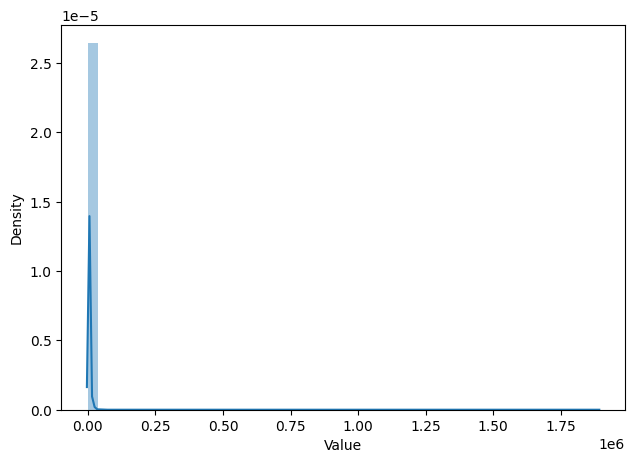

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Value'])

plt.show()

In [6]:
df['Value'].describe()

count    7.406000e+04
mean     1.259122e+03
std      1.201013e+04
min      0.000000e+00
25%      5.953395e+01
50%      3.401940e+02
75%      9.979024e+02
max      1.889214e+06
Name: Value, dtype: float64

<Axes: ylabel='Value'>

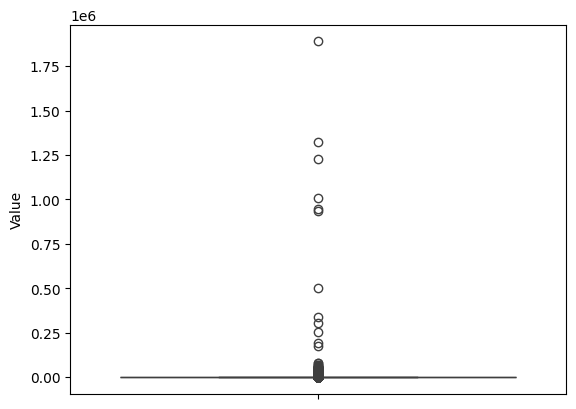

In [7]:
sns.boxplot(df['Value'])

In [8]:
# Finding the IQR
percentile25 = df['Value'].quantile(0.25)
percentile75 = df['Value'].quantile(0.75)

In [9]:
percentile75

np.float64(997.9024)

In [10]:
iqr = percentile75 - percentile25

In [11]:
iqr

np.float64(938.3684499999999)

In [12]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [13]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2405.455075
Lower limit -1348.018725


## Finding Outliers

In [14]:
df[df['Value'] > upper_limit]

,sample_id,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec764,vec765,vec766,vec767,vec768,Unit_grams,Unit_ml,Value,image_link,price
6,191846,-0.966748,-0.405917,-0.247860,-0.142179,-0.676889,-0.096780,0.506040,0.821569,0.145495,...,0.375850,0.073292,-0.804088,0.411075,-0.091737,1,0,5102.9100,https://m.media-amazon.com/images/I/61dH2Ebkt0...,5.990
8,37614,-0.816133,-0.304266,0.028792,-0.038642,-0.132929,0.038565,-0.047943,-0.013950,-0.121010,...,-0.175256,-0.168181,-0.442148,0.219926,0.283424,0,1,5678.1120,https://m.media-amazon.com/images/I/21O9RftI2v...,35.740
11,283223,-0.480925,-0.042879,-0.072838,-0.106504,-0.359071,0.156069,0.034318,0.446406,-0.466703,...,-0.214349,-0.408995,-0.320968,-0.172563,0.358035,1,0,4535.9200,https://m.media-amazon.com/images/I/71qkXfh7y3...,33.500
13,170292,-0.931006,0.072186,-0.446066,-0.303270,-0.015162,-0.296247,-0.144546,0.444893,-0.026257,...,0.163779,-0.125541,0.127285,0.090277,0.800893,0,1,5678.1120,https://m.media-amazon.com/images/I/31JwrRY9yq...,4.255
14,71500,-0.742803,0.129126,0.012334,-0.013067,-0.389293,0.075585,0.166074,0.295455,-0.482389,...,-0.289414,-0.069699,-0.539124,-0.438613,0.512737,0,1,9936.6960,https://m.media-amazon.com/images/I/81lSX9agSy...,1.670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74975,18392,-0.627880,-0.450531,-0.125101,0.180071,0.027980,-0.008641,0.445534,0.218566,-0.196685,...,0.092319,-0.334224,0.027619,0.265950,0.251322,1,0,22679.6000,https://m.media-amazon.com/images/I/41RQVY6CJ8...,139.020
74978,208895,-0.756096,-0.336604,0.107664,0.351303,0.106695,-0.106900,-0.249584,0.531141,-0.390426,...,0.630049,-0.170461,-0.114971,0.004600,0.091512,1,0,5613.2010,https://m.media-amazon.com/images/I/81k2q6gpJQ...,3.760
74982,253483,-1.331174,-0.694241,-0.395351,0.258877,-0.328687,-0.017151,-0.013051,0.625342,-0.115219,...,0.037498,-0.232279,-0.215533,-0.130390,0.085757,1,0,3401.9400,https://m.media-amazon.com/images/I/71RqoDuzt8...,2.490
74983,28041,-0.007936,-0.199773,0.357353,0.014984,0.109222,-0.426324,0.369352,0.499865,-0.113232,...,-0.183337,-0.308049,-0.333015,0.352443,0.430900,1,0,2925.6684,https://m.media-amazon.com/images/I/A1AjJ3VVf9...,2.970


In [15]:
df[df['Value'] < lower_limit]

,sample_id,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,...,vec764,vec765,vec766,vec767,vec768,Unit_grams,Unit_ml,Value,image_link,price


## Trimming

In [16]:
new_df = df[df['Value'] < upper_limit]

In [17]:
new_df.shape

(65249, 774)

C:\Users\satya\AppData\Local\Temp\ipykernel_25384\780564458.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Value'])
C:\Users\satya\AppData\Local\Temp\ipykernel_25384\780564458.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Value'])


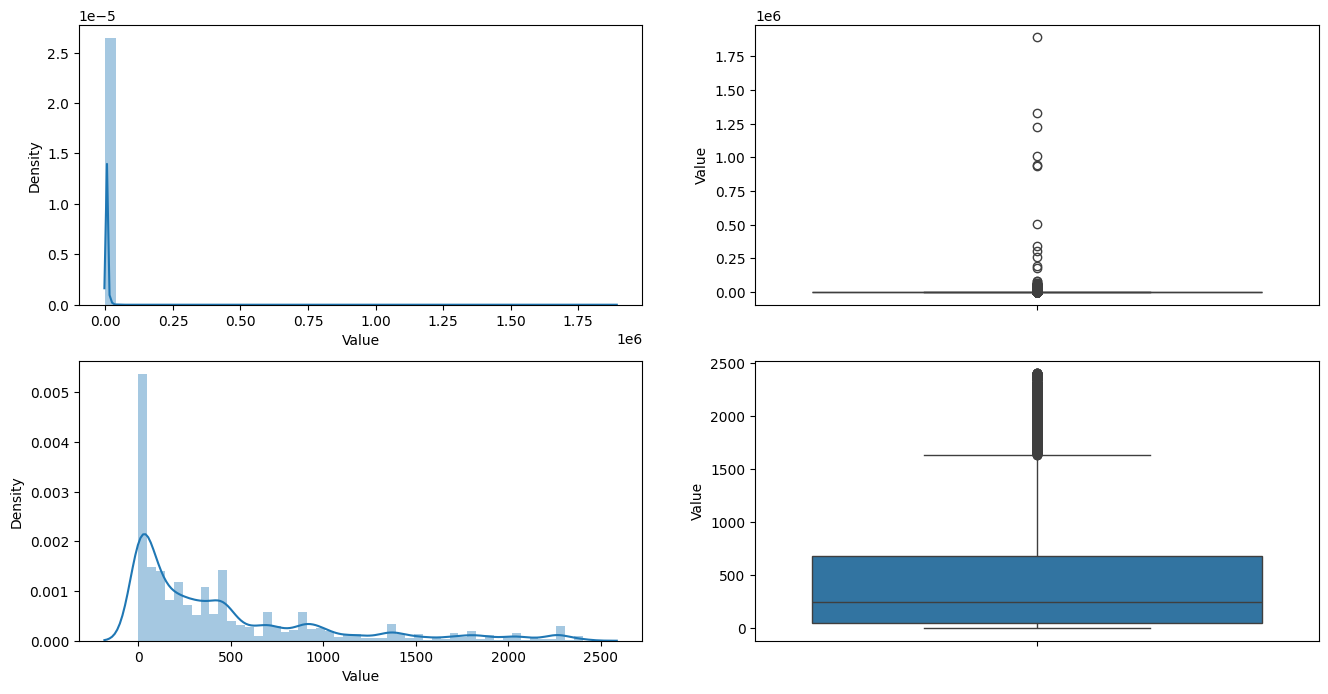

In [18]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Value'])

plt.subplot(2,2,2)
sns.boxplot(df['Value'])

plt.subplot(2,2,3)
sns.distplot(new_df['Value'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Value'])

plt.show()

## Capping

In [19]:
new_df_cap = df.copy()

new_df_cap['Value'] = np.where(
    new_df_cap['Value'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Value'] < lower_limit,
        lower_limit,
        new_df_cap['Value']
    )
)

In [20]:
np.where(condtion,true,false)

NameError: name 'condtion' is not defined

In [21]:
new_df_cap.shape

(75000, 774)

C:\Users\satya\AppData\Local\Temp\ipykernel_25384\2569412188.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Value'])
C:\Users\satya\AppData\Local\Temp\ipykernel_25384\2569412188.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Value'])


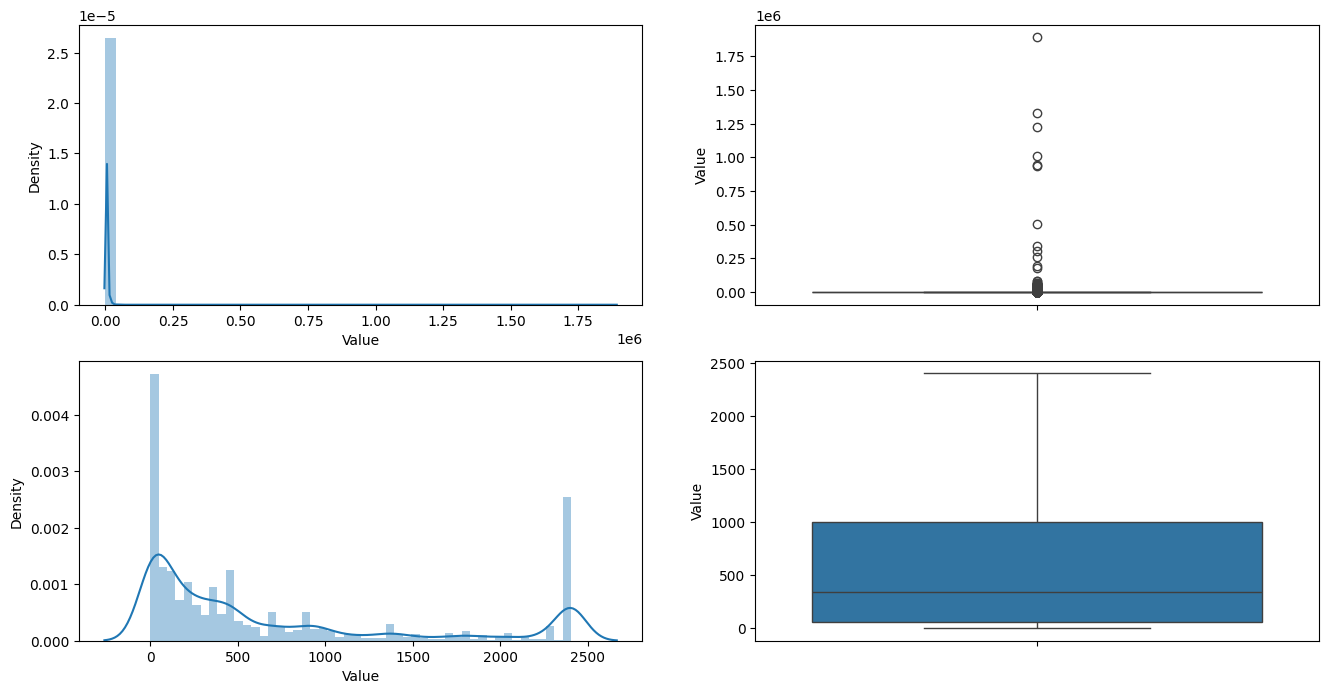

In [22]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Value'])

plt.subplot(2,2,2)
sns.boxplot(df['Value'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Value'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Value'])

plt.show()

In [25]:
df.shape

(75000, 774)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(75000, 774)

In [30]:
df = df.drop(['image_link', 'sample_id', 'Value'], axis=1)


In [31]:
corr=df.corr()

In [37]:
corr

,vec1,vec2,vec3,vec4,vec5,vec6,vec7,vec8,vec9,vec10,...,vec762,vec763,vec764,vec765,vec766,vec767,vec768,Unit_grams,Unit_ml,price
vec1,1.000000,0.051287,0.112488,0.145379,0.151930,-0.339045,0.145559,0.122848,0.175909,-0.259651,...,0.014630,-0.120110,0.127410,-0.047215,0.147665,0.241966,-0.017029,0.009700,-0.034557,-0.027022
vec2,0.051287,1.000000,-0.028541,-0.012707,0.115478,0.267965,-0.042390,-0.043537,-0.206712,0.253634,...,0.258759,0.274809,-0.178046,-0.109446,-0.107148,0.010832,0.047893,0.041118,-0.005843,-0.051922
vec3,0.112488,-0.028541,1.000000,0.193460,0.104015,-0.052886,-0.139879,-0.201135,-0.076961,0.034278,...,0.081038,0.133963,-0.026096,-0.136337,0.008440,-0.309311,0.063595,-0.111335,0.013745,-0.027399
vec4,0.145379,-0.012707,0.193460,1.000000,0.018366,0.073962,-0.041185,0.032425,-0.173241,0.144339,...,0.287599,0.183910,0.101211,0.043607,0.022836,-0.246241,-0.142068,0.054417,-0.042443,-0.062430
vec5,0.151930,0.115478,0.104015,0.018366,1.000000,0.127848,-0.328808,-0.054865,-0.090140,0.091242,...,0.085755,0.106654,-0.161364,-0.164190,0.169746,-0.078435,-0.106836,0.069474,-0.050154,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vec767,0.241966,0.010832,-0.309311,-0.246241,-0.078435,-0.325527,0.220277,0.273617,0.104867,-0.307032,...,-0.269140,-0.336879,0.077884,0.019021,-0.012795,1.000000,0.010544,0.024152,-0.066396,0.075325
vec768,-0.017029,0.047893,0.063595,-0.142068,-0.106836,-0.104091,-0.168644,-0.026683,0.002458,0.018387,...,-0.015669,0.008724,-0.027705,-0.095279,0.101445,0.010544,1.000000,-0.010732,0.001229,0.001299
Unit_grams,0.009700,0.041118,-0.111335,0.054417,0.069474,0.029414,-0.054245,0.124832,-0.089118,-0.024683,...,-0.039582,0.039694,0.074932,0.070695,0.026535,0.024152,-0.010732,1.000000,-0.507781,-0.078288
Unit_ml,-0.034557,-0.005843,0.013745,-0.042443,-0.050154,0.003640,-0.002292,-0.079082,0.101903,0.096431,...,0.081335,-0.003946,-0.067901,-0.001757,-0.079289,-0.066396,0.001229,-0.507781,1.000000,-0.032477


In [32]:
t=0.6


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1️⃣ Select your vector columns
vec_cols = [col for col in df.columns if col.startswith('vec')]
X = df[vec_cols]

# 2️⃣ Scale the data (autoencoders work better with normalized input)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Define Autoencoder architecture
input_dim = X_scaled.shape[1]      # e.g., 768
encoding_dim = 10                  # compress to 5 features

input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 4️⃣ Build and compile models
autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5️⃣ Train Autoencoder
autoencoder.fit(
    X_scaled, X_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    verbose=1
)

# 6️⃣ Get compressed features
compressed_features = encoder.predict(X_scaled)

# 7️⃣ Create a new DataFrame with the compressed columns + target
compressed_df = pd.DataFrame(compressed_features, columns=[f'AE_{i+1}' for i in range(encoding_dim)])
compressed_df['price'] = df['price']

print(compressed_df.head())


Epoch 1/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.8316
Epoch 2/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.7604
Epoch 3/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.7515
Epoch 4/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.7466
Epoch 5/100
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.7426
Epoch 6/100
1011/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.7421 